Name: Gokulakrishnan B
Roll No: DA24M007
Assignment No: 2

In [37]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [38]:
# Loading the data into a dataframe and removing the Stock price data, as we are only working with Spring Position dataset
df = pd.read_csv('Assignment2.data',sep='\t')
df = pd.DataFrame(df['SpringPos'])

In [3]:
# Exploring first five columns of df
df.head()

,SpringPos
0,2.27
1,6.38
2,8.61
3,8.65
4,13.17


In [4]:
df.describe()

,SpringPos
count,226.000000
mean,3.785221
std,10.704778
min,-19.910000
25%,-3.960000
50%,4.195000
75%,11.295000
max,26.100000


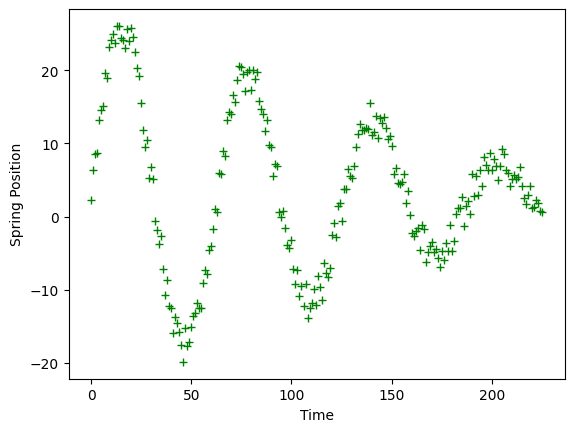

In [5]:
plt.plot(df.SpringPos,'g+')
plt.xlabel('Time')
plt.ylabel('Spring Position')
plt.show()

Here, we have plotted the `SpringPos` column. We can observe that it follows a `sin` like curve but with decreasing amplitude in each iteration

## Fitting a linear model

In [6]:
y1 = pd.DataFrame({"x":range(226), "y":df.SpringPos})
y1.head()

,x,y
0,0,2.27
1,1,6.38
2,2,8.61
3,3,8.65
4,4,13.17


In [7]:
yy = np.array(y1.y) 
xx = np.expand_dims(y1.x, 1)

Here we are storing the x and y in xx and yy variables, and changing the dimension so that we can perform matrix multplication

In [8]:
yy[:5],xx[:5]

(array([ 2.27,  6.38,  8.61,  8.65, 13.17]),
 array([[0],
        [1],
        [2],
        [3],
        [4]]))

In [9]:
def compute_beta(x,y):
    num = np.matmul(np.transpose(x),y)
    den_inv = np.linalg.inv(np.matmul(np.transpose(x),x))
    beta = np.matmul(den_inv,num)
    return beta

In [10]:
def predict(x,beta):
    if len(x) != 2:
        x = np.expand_dims(x,1)
    beta = np.array(beta)
    y_pred= np.matmul(beta,x)
    return y_pred

In [11]:
def compute_sse(y,y_pred):
    return np.sum((y - y_pred)**2)

In [12]:
beta1 = compute_beta(xx, yy)
print("beta =", beta1)
yhat1 = predict(beta1, xx)
loss = compute_sse(yy, yhat1)
print("SSE =", loss)

beta = [0.01832175]
SSE = 6051804.179873579


The OLS solution without bias, gives the beta(weight) value to be 0.018, that produces a loss of 6051804 sse. The predicted line is plotted below

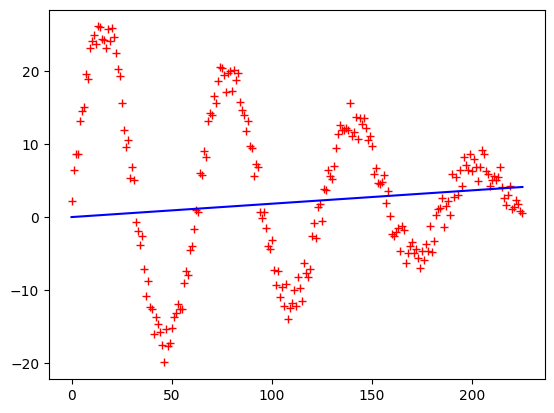

In [13]:
plt.plot(y1.x,yy,'r+')
plt.plot(y1.x,yhat1,'b-')
plt.show()

Now, we are experimenting with the value of beta as function of tan(x) where x takes the values from 0 to 60 with a step size of 5

[]

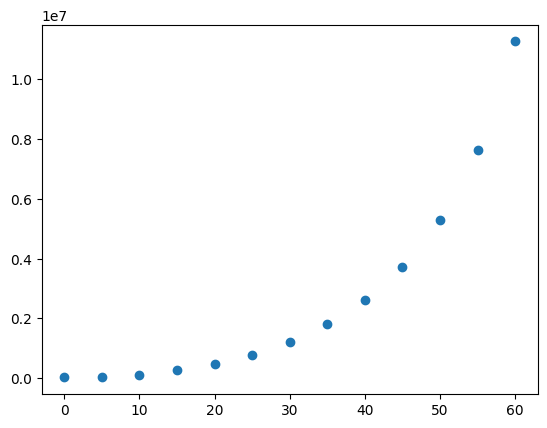

In [14]:
m = [i for i in range(0,61,5)]
errors = []
for i in m: 
    y_ = y1.x * np.tan(np.radians(i)) 
    e_ = np.sum((y_ - y1.y)**2)
    errors.append(e_) 

plt.scatter(m,errors)
plt.plot()

In [15]:
errors[0],np.tan(np.radians(0))

(np.float64(29021.3684), np.float64(0.0))

Here, m being 0 resulted in minimum sse of 29,021. tan(0) = 0

Here, we are adding bias as 1 (just experimenting, no guarantee that it will result in a better solution)

In [16]:
y1df = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":df.SpringPos})
yy = np.array(y1df.y) 
xx = np.array(y1df[["bias","x"]])
y1df.head()

,bias,x,y
0,1.0,0,2.27
1,1.0,1,6.38
2,1.0,2,8.61
3,1.0,3,8.65
4,1.0,4,13.17


In [17]:
beta2 = compute_beta(xx, yy)
print("beta =", beta2)
yhat2 = predict(beta2, xx)
loss = compute_sse(yy, yhat2)
print("SSE =", loss)

beta = [ 6.8505263  -0.02724716]
SSE = 25069.131971939343


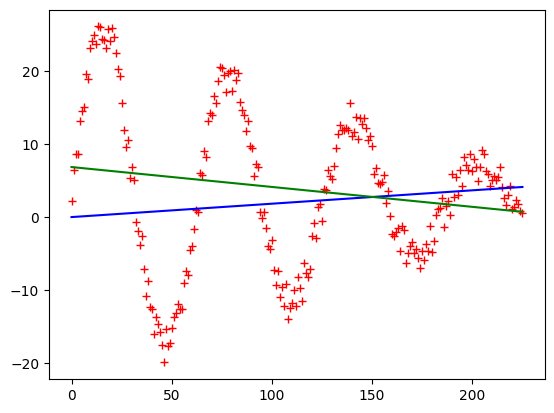

In [18]:
plt.plot(y1.x,yy,'r+')
plt.plot(y1.x,yhat1,'b-')
plt.plot(y1.x,yhat2,'g-')
plt.show()

It does result in a better solution as the sse with bias is less than sse without bias

In [19]:
x1 = round( y1df.x*beta2[1] ,2)
x2 = np.sin(x1)

y11 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":df.SpringPos})
y11.head(10)

,bias,x,x1,x2,y
0,1.0,0,-0.00,-0.000000,2.27
1,1.0,1,-0.03,-0.029996,6.38
2,1.0,2,-0.05,-0.049979,8.61
3,1.0,3,-0.08,-0.079915,8.65
4,1.0,4,-0.11,-0.109778,13.17
5,1.0,5,-0.14,-0.139543,14.52
6,1.0,6,-0.16,-0.159318,15.12
7,1.0,7,-0.19,-0.188859,19.62
8,1.0,8,-0.22,-0.218230,18.91
9,1.0,9,-0.25,-0.247404,23.17


We are adding two more cols, x1 and x2, where x is muliplied with the beta(weight) and stored in x1 and the sin(x1) is stored in x2

In [20]:
xx = np.array(y11[['bias', 'x1', 'x2']])
yy = np.array(y11.y) 

In [21]:
beta3 = compute_beta(xx, yy)
print("Beta = ", beta3)
yhat3 = predict(beta3, xx)
loss = compute_sse(yy, yhat3) #np.sum((np.matmul(xx,beta) - yy)**2)
print("SSE = ", loss)

Beta =  [11.99634589  2.6761454   5.21496085]
SSE =  6243668.696063939


Text(0.5, 0, 'Time')

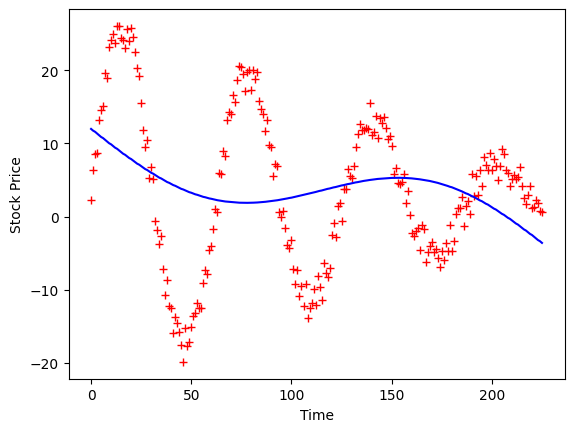

In [22]:
plt.plot(y1.x, y1.y, 'r+')
plt.plot(y11.x, yhat3, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')

The predicted output is not so great. we could see a sin wave like pattern, but it is not able to model the datapoints properly.

In [42]:
xx = np.array(y11[['x1']])
yy = np.array(y1.y) 

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 11)   # 10, 11
X_poly = poly_transformer.fit_transform(xx)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
yhat4 = model.predict(X_poly)

loss = compute_sse(yy, yhat4)
print("SSE = ", loss)

SSE =  2100.180889163878


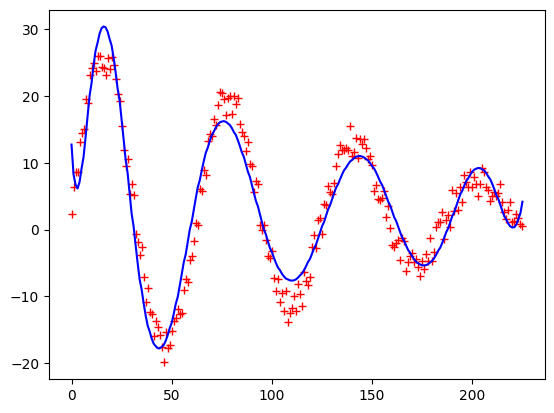

In [26]:
plt.plot(y1.x, y1.y, 'r+')
plt.plot(y1.x, yhat4, 'b-')
plt.show()

Here, we are trying with polynomial regression model, with degree as 11 with only x1 as the input variable. Lets try to have the x2 and bias variable as well to check if we can reduce the model loss.

In [27]:
# lets habve sin(x) as a feature for polynomial rLinearRegression
xx = np.array(y11[['bias', 'x1', 'x2']])
yy = np.array(y11.y) 

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 10)   # 10, 11
X_poly = poly_transformer.fit_transform(xx)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
yhat5 = model.predict(X_poly)

loss = compute_sse(yy, yhat5)
print("SSE = ", loss)

SSE =  426.573592832432


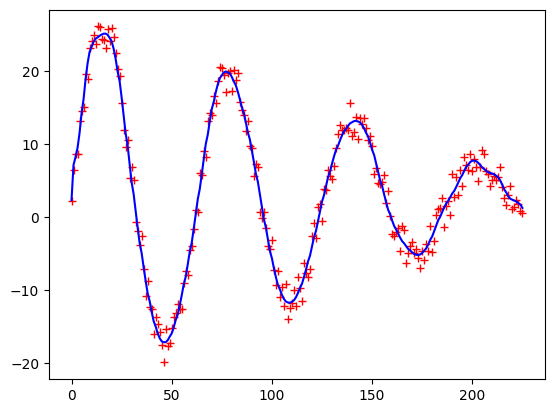

In [30]:
plt.plot(y1.x, y1.y, 'r+')
plt.plot(y1.x, yhat5, 'b-')
plt.show()

Here, the loss is just 426, less than polynomial ,model without x2 and bias. Now, lets model degree vs loss curve and check which degree results in lowest loss

In [31]:
# Lets plot a curve for loss against values of degree of polynomial 

def poly(d):
    poly_transformer = PolynomialFeatures(degree = d)   
    X_poly = poly_transformer.fit_transform(xx)
    model = LinearRegression().fit(X_poly, yy)
    yhat5 = model.predict(X_poly)
    loss = compute_sse(yy, yhat5)

    return loss

loss = [0]*50
for i in range(50):
    loss[i] = poly(i)

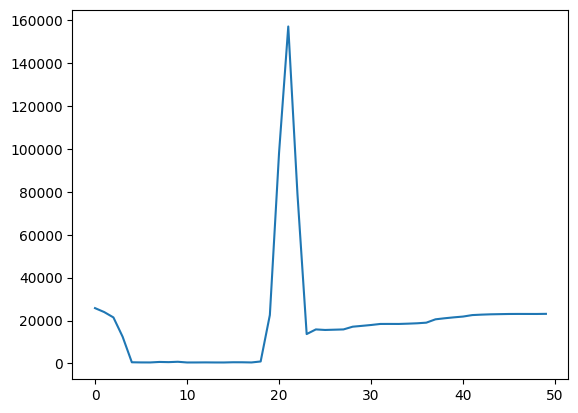

In [32]:
plt.plot(loss)
plt.show()

Here, we can see that in the range(4,20), the loss is low, and degree 10 gives the lowest loss in the range.

Here, we are spliting the dataset into train, and test datasets, so thar we can check the performance of the model in the unseen data.

In [33]:
X_train, X_test, y_train, y_test = train_test_split( xx,yy, test_size=0.33, random_state=42)

poly_transformer = PolynomialFeatures(degree = 10) 

X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

model = LinearRegression().fit(X_train_poly, y_train)

y_pred_train= model.predict(X_train_poly)
loss = compute_sse(y_train, y_pred_train)
print(f'Training loss: {loss}')

Training loss: 281.9439114786071


In [34]:
y_pred_test = model.predict(X_test_poly)
loss = compute_sse(y_test, y_pred_test)
print(f'Training loss: {loss}')

Training loss: 205.6419852621261


The test loss < train loss => less bias and loss is almost comparably less different in train and test, thus the variance is loss. Thus the model performs good as both bias and variance are under control.

In [35]:
def poly_train_loss(deg):
    poly_transformer = PolynomialFeatures(degree = i) 
    
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_test_poly = poly_transformer.transform(X_test)
    
    model = LinearRegression().fit(X_train_poly, y_train)
    
    y_pred_train= model.predict(X_train_poly)
    train_loss = compute_sse(y_train, y_pred_train)
    training_losses.append(train_loss/len(X_train)) # Average SSE
    
    y_pred_test = model.predict(X_test_poly)
    test_loss = compute_sse(y_test, y_pred_test)
    testing_losses.append(test_loss/len(X_test)) # Average SSE
    

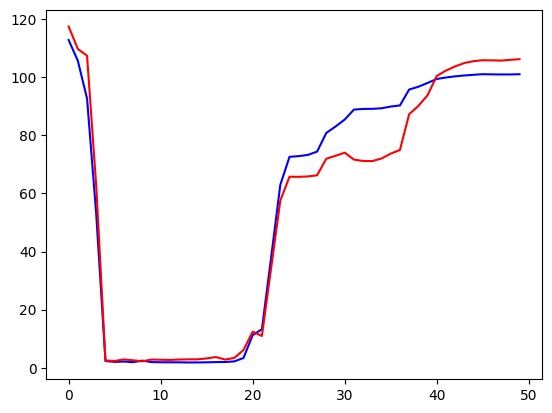

In [36]:
training_losses = []
testing_losses=[]

for i in range(50):
    poly_train_loss(i)

plt.plot(training_losses,color = 'blue')
plt.plot(testing_losses, color='red')

Here, we are plotting the train and test loss across various degrees in the polynomial model. We can observe that the model is not overfitting for almost all the degree values from 0 to 50. Both train and test loss is lowest in the interval between 5 and 18. Thus our choice of 10 as the degree is good.